<a href="https://colab.research.google.com/github/t8101349/Colab-/blob/master/3_02_LAB_HousePrice_%E4%BD%9C%E6%A5%AD_28_%E7%8E%8B%E9%9F%8B%E5%8D%9A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 作業
使用Gradio建立一個計算BMI的程式

* 完成後請寄到EMAIL : clement.class.02@gmail.com
* 信件主旨請設定為： 3-02.LAB_HousePrice_作業_學號_姓名  (例: "3-02.LAB_HousePrice_作業_00_陳仁政")
* 附件檔名請設定為： 3-02.LAB_HousePrice_作業_學號_姓名.ipynb (例: "3-02.LAB_HousePrice_作業_00_陳仁政.ipynb")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#載入訓練用資料
import pandas as pd
import numpy as np
data = pd.read_csv('/content/drive/MyDrive/HousePrice_train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,255,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,145000
1,1067,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,178000
2,639,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal,85000
3,800,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,175000
4,381,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,127000


In [4]:
#列出欄位名稱
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    951 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          74 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [8]:
# 刪除 price為空值的資料列
data = data.dropna(subset=['SalePrice'])

In [9]:
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
class AutoPreprocess:
    def __init__(self):
        self.scaler = {}
        self.fillna_value = {}
        self.onehotencode_value = {}
        self.field_names = []
        self.final_field_names = []

    def fit(self, data, field_names):
        self.__init__()
        self.field_names = field_names

        for fname in field_names:
            #自動補空值
            if (data[fname].dtype == object) or (data[fname].dtype == str): #字串型態欄位
                self.fillna_value[fname] = data[fname].mode()[0] #補眾數
                # self.fillna_value[fname] = 'np.nan'
                # self.fillna_value[fname] = np.nan # 維持空值
            elif data[fname].dtype == bool: #布林型態
                self.fillna_value[fname] = data[fname].mode()[0] #補眾數
            else: # 數字型態
                self.fillna_value[fname] = data[fname].median()  #補中位數

            #自動尺度轉換(scaling)
            if (data[fname].dtype == object) or (data[fname].dtype == str): #字串型態欄位
                pass #不用轉換
            elif data[fname].dtype == bool: #布林型態
                pass #不用轉換
            else: # 數字型態
                vc = data[fname].value_counts()
                if data[fname].isin([0, 1]).all(): #當數值只有0跟1
                    pass #不用轉換
                elif pd.api.types.is_integer_dtype(data[fname]) and data[fname].nunique() <= 10: #是否簡單的整數型類別且數量小於10
                    self.scaler[fname] = MinMaxScaler()
                    self.scaler[fname].fit(data[[fname]])
                else: #其他的數字型態
                    self.scaler[fname] = StandardScaler()
                    self.scaler[fname].fit(data[[fname]])


            #自動編碼
            if (data[fname].dtype == object) or (data[fname].dtype == str): #字串型態欄位, onehotencode
                field_value = data[fname].value_counts().index
                self.onehotencode_value[fname] = field_value
                for value in field_value:
                    fn = fname+"_"+value
                    # data[fn] = (data[fname] == value).astype('int8')
                    self.final_field_names.append(fn)
            elif data[fname].dtype == bool: #布林型態 轉成0跟1
                # data[fname] = data[fname].astype(int)
                self.final_field_names.append(fname)
            else: # 數字型態 不用重新編碼
                self.final_field_names.append(fname)

        return

    def transform(self, data):
        #如果輸入的data是dict，要先轉成dataframe
        if isinstance(data, dict):
            for fname in self.field_names:
                if fname in data:
                    data[fname] = [data[fname]]
                else:
                    data[fname] = [np.nan]
            data = pd.DataFrame(data)
        else: #將資料複製一份，不修改原本的資料
            data = data.copy()

        for fname in self.field_names:
            #自動補空值
            if data[fname].isnull().any(): #有空值
                # if fname in self.fillna_value:
                    data[fname] = data[fname].fillna(self.fillna_value[fname])


            #自動尺度轉換(scaling)
            if fname in self.scaler:
                data[fname] = self.scaler[fname].transform(data[[fname]])

            #自動編碼
            if (data[fname].dtype == object) or (data[fname].dtype == str): #字串型態欄位, onehotencode
                if fname in self.onehotencode_value:
                    field_value = self.onehotencode_value[fname]
                for value in field_value:
                    fn = fname+"_"+value
                    data[fn] = (data[fname] == value).astype('int8')
            elif data[fname].dtype == bool: #布林型態 轉成0跟1
                data[fname] = data[fname].astype(int)
            else: # 數字型態 不用重新編碼
                pass
        return data[self.final_field_names]

    def save(self, file_name):
        with open(file_name, "wb") as f:
            pickle.dump(self, f)

    @staticmethod
    def load(file_name):
        with open(file_name, "rb") as f:
            return pickle.load(f)

In [11]:
ap = AutoPreprocess()
ap.fit(data, ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'])
ap.save("/content/drive/MyDrive/preprocess.bin")

X = ap.transform(data)
y = data['SalePrice']

<ipython-input-9-03578fafdf5e>:91: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[fn] = (data[fname] == value).astype('int8')
<ipython-input-9-03578fafdf5e>:91: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[fn] = (data[fname] == value).astype('int8')
<ipython-input-9-03578fafdf5e>:91: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented

In [12]:
from sklearn.model_selection import train_test_split
# 分割資料成訓練組跟驗證組
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0)

In [17]:
# 訓練模型
from sklearn.neural_network import MLPRegressor
model_1 = MLPRegressor(hidden_layer_sizes=(200,), max_iter=200, random_state=42)

model_1.fit(X_train, y_train)



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(200,), random_state=42)

訓練組 R2: -4.398665720284999
驗證組 R2: -5.876533969682364


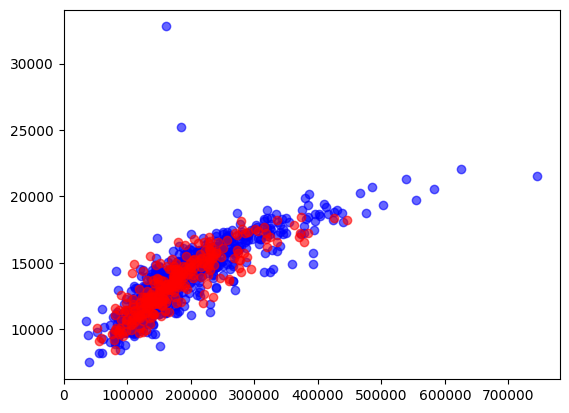

In [18]:
# 驗證模型
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
y_pred = model_1.predict(X_train)
r2 = r2_score(y_train, y_pred)
print("訓練組 R2:", r2)
plt.scatter(y_train, y_pred, alpha=0.6, color='b')
# plt.show()

y_pred = model_1.predict(X_valid)
r2 = r2_score(y_valid, y_pred)
print("驗證組 R2:", r2)
plt.scatter(y_valid, y_pred, alpha=0.6, color='r')
plt.show()

In [20]:
#儲存模型
import pickle

with open("/content/drive/MyDrive/model_1.bin", "wb") as f:
    pickle.dump(model_1, f)


In [21]:
# from sklearn.tree import DecisionTreeRegressor
# model = DecisionTreeRegressor()

from sklearn.ensemble import RandomForestRegressor
model_2 = RandomForestRegressor()

model_2.fit(X_train, y_train)

RandomForestRegressor()

訓練組 R2: 0.9769631538341546
驗證組 R2: 0.8678906910689704


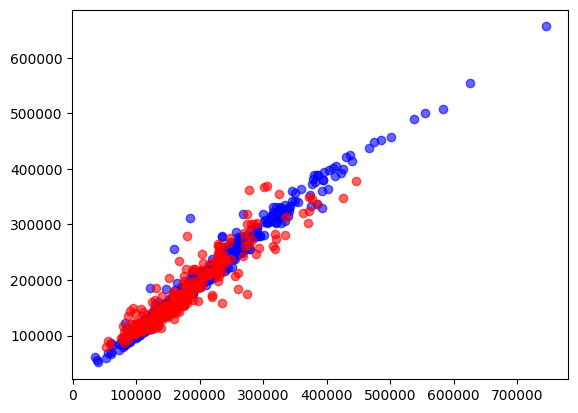

In [24]:
# 驗證模型
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
y_pred = model_2.predict(X_train)
r2 = r2_score(y_train, y_pred)
print("訓練組 R2:", r2)
plt.scatter(y_train, y_pred, alpha=0.6, color='b')
#　plt.show()

y_pred = model_2.predict(X_valid)
r2 = r2_score(y_valid, y_pred)
print("驗證組 R2:", r2)
plt.scatter(y_valid, y_pred, alpha=0.6, color='r')
plt.show()

In [23]:
#儲存模型
import pickle

with open("/content/drive/MyDrive/model_2.bin", "wb") as f:
    pickle.dump(model_2, f)


In [26]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.svm import SVR

param_grid = [
    {"kernel": ["linear"],"C":[0.1,1,10,100,100]},
    {"kernel": ["poly"], "degree": [2, 3],"C":[0.1,1,10,100,100],"gamma":["scale", "auto"]},
    {"kernel": ["rbf"],"C":[0.1,1,10,100,100],"gamma":["scale", "auto"]},
]

model_3 = SVR()

search = RandomizedSearchCV(estimator=model_3, param_distributions=param_grid, scoring="r2")
search.fit(X, y)

RandomizedSearchCV(estimator=SVR(),
                   param_distributions=[{'C': [0.1, 1, 10, 100, 100],
                                         'kernel': ['linear']},
                                        {'C': [0.1, 1, 10, 100, 100],
                                         'degree': [2, 3],
                                         'gamma': ['scale', 'auto'],
                                         'kernel': ['poly']},
                                        {'C': [0.1, 1, 10, 100, 100],
                                         'gamma': ['scale', 'auto'],
                                         'kernel': ['rbf']}],
                   scoring='r2')

In [27]:
search.best_params_

{'kernel': 'linear', 'C': 10}

In [28]:
search.cv_results_

{'mean_fit_time': array([0.12920427, 0.1280396 , 0.18055973, 0.1386158 , 0.13471994,
        0.14734917, 0.19479127, 0.18783336, 0.18338523, 0.13911314]),
 'std_fit_time': array([0.00683617, 0.00362152, 0.10915656, 0.00394779, 0.00652702,
        0.03494614, 0.01149727, 0.00716551, 0.02742644, 0.00453128]),
 'mean_score_time': array([0.03151207, 0.03320708, 0.04304128, 0.07257767, 0.03240933,
        0.03193083, 0.1195477 , 0.04708409, 0.10727773, 0.07422504]),
 'std_score_time': array([0.00079737, 0.00406879, 0.01587792, 0.00122048, 0.0008948 ,
        0.00047334, 0.00118141, 0.00245837, 0.02285081, 0.00288449]),
 'param_kernel': masked_array(data=['poly', 'poly', 'linear', 'rbf', 'poly', 'poly', 'rbf',
                    'poly', 'rbf', 'rbf'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=['auto', 'auto', --, 'scale', 'auto', 'auto', 

In [29]:
#儲存模型
import pickle

with open("/content/drive/MyDrive/model_3.bin", "wb") as f:
    pickle.dump(search.best_estimator_, f)


訓練組 R2: 0.5551296431068535
驗證組 R2: 0.6102451323653608


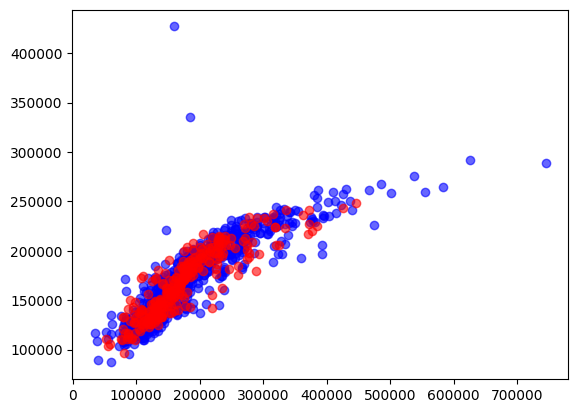

In [30]:
# 驗證模型
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
model = search.best_estimator_

y_pred = model.predict(X_train)
r2 = r2_score(y_train, y_pred)
print("訓練組 R2:", r2)
plt.scatter(y_train, y_pred, alpha=0.6, color='b')

y_pred = model.predict(X_valid)
r2 = r2_score(y_valid, y_pred)
print("驗證組 R2:", r2)
plt.scatter(y_valid, y_pred, alpha=0.6, color='r')
plt.show()

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score


def getFieldImpact(model, x, y, score):
    prediction = model.predict(x)
    full_field_score = score(y, prediction)
    impact = {}
    for column_name in x.columns:
        x2 = x.copy()
        column_data = x2[column_name].to_numpy()
        np.random.shuffle(column_data)
        x2[column_name] = column_data
        p2 = model.predict(x2)
        score2 = score(y, p2)
        impact[column_name] = (full_field_score - score2) / full_field_score
    return impact



impact = getFieldImpact(model_1, X, y, r2_score)
# Sort the dictionary items by value in descending order
sorted_impact = dict(sorted(impact.items(), key=lambda x: x[1], reverse=True))

# Now sorted_impact contains the sorted dictionary
sorted_impact

{'ExterQual_TA': 0.00044991918098735755,
 'KitchenQual_TA': 0.00037770662008006456,
 'BsmtQual_TA': 0.00035521042097880114,
 'GarageFinish_Unf': 0.00034801315500058197,
 'Foundation_CBlock': 0.00029462801275298423,
 'HeatingQC_TA': 0.00024273396441191027,
 'GarageType_Detchd': 0.00022472808278236475,
 'BsmtExposure_No': 0.00022405423769035105,
 'LotShape_Reg': 0.00016374789033140114,
 'RoofStyle_Gable': 0.00015993428056584747,
 'MSZoning_RM': 0.00013309757256893466,
 'Neighborhood_NAmes': 0.0001306751800948272,
 'MasVnrType_BrkFace': 0.0001200655690663409,
 'Exterior2nd_Wd Sdng': 0.0001169264549671518,
 'SaleType_WD': 0.0001151498251214675,
 'FireplaceQu_Gd': 0.00010540408220794569,
 'Exterior1st_Wd Sdng': 9.916472939145583e-05,
 'CentralAir_N': 9.855092574226343e-05,
 'HouseStyle_1.5Fin': 8.952087525226712e-05,
 'SaleCondition_Normal': 8.562498131185398e-05,
 'BsmtFinType1_ALQ': 8.521220369899967e-05,
 'Exterior1st_MetalSd': 8.053217150278861e-05,
 'Electrical_FuseA': 7.91271247242489

In [36]:
impact = getFieldImpact(model_2, X, y, r2_score)
# Sort the dictionary items by value in descending order
sorted_impact = dict(sorted(impact.items(), key=lambda x: x[1], reverse=True))

# Now sorted_impact contains the sorted dictionary
sorted_impact

{'OverallQual': 0.5338858207723165,
 'GrLivArea': 0.1377967810193046,
 'TotalBsmtSF': 0.03624994549247198,
 '1stFlrSF': 0.025487099750970677,
 'BsmtFinSF1': 0.023121935912304586,
 '2ndFlrSF': 0.019902689309697616,
 'LotArea': 0.01441944492363265,
 'GarageArea': 0.010815808767657972,
 'LotFrontage': 0.0071454736667379195,
 'TotRmsAbvGrd': 0.006713153029430118,
 'YearBuilt': 0.006641152544240998,
 'GarageCars': 0.005963359607832018,
 'OpenPorchSF': 0.00529695447050912,
 'GarageFinish_Unf': 0.004979703067627531,
 'YearRemodAdd': 0.004406461660791068,
 'GarageYrBlt': 0.003667881425235843,
 'OverallCond': 0.0035746101171320248,
 'BsmtUnfSF': 0.002956267845380598,
 'Fireplaces': 0.0023029522099764018,
 'FullBath': 0.0022766725406828388,
 'MoSold': 0.002209115919912302,
 'MasVnrArea': 0.0018950631484268637,
 'BsmtQual_Ex': 0.0018848432147523532,
 'KitchenQual_Gd': 0.0015913956265020683,
 'BsmtExposure_No': 0.0013795017221914891,
 'LandContour_Bnk': 0.001376831374203811,
 'ScreenPorch': 0.0013

In [33]:
impact = getFieldImpact(model, X, y, r2_score)
impact

{'MSSubClass': 0.0019012045461376473,
 'MSZoning_RL': 0.0016346113671772034,
 'MSZoning_RM': 0.0016722019560902667,
 'MSZoning_FV': 0.00010291537254542326,
 'MSZoning_RH': 9.973153444379543e-06,
 'MSZoning_C (all)': 3.0201973114039047e-06,
 'LotFrontage': 0.011644362539391419,
 'LotArea': 0.016326830968778367,
 'Street_Pave': 3.356641516744879e-07,
 'Street_Grvl': 1.3475217016483413e-06,
 'Alley_Grvl': 4.4925797926330587e-07,
 'Alley_Pave': 3.0286475839493114e-06,
 'LotShape_Reg': 0.0023321803581148395,
 'LotShape_IR1': 0.001331064137673575,
 'LotShape_IR2': 0.00016704106523642072,
 'LotShape_IR3': -2.461958689757737e-06,
 'LandContour_Lvl': 6.793176285289215e-05,
 'LandContour_Bnk': 7.405887257982997e-05,
 'LandContour_HLS': 0.00022041313308195608,
 'LandContour_Low': 9.883101393958091e-06,
 'Utilities_AllPub': 9.70041275814378e-07,
 'Utilities_NoSeWa': 1.423310810908827e-07,
 'LotConfig_Inside': 0.0001448829875157906,
 'LotConfig_Corner': -1.4254598542200554e-06,
 'LotConfig_CulDSac'

In [40]:
test_data = pd.read_csv('/content/drive/MyDrive/HousePrice_test.csv')
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,893,20,RL,70.0,8414,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2006,WD,Normal,154500
1,1106,60,RL,98.0,12256,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,325000
2,414,30,RM,56.0,8960,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,115000
3,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,159000
4,1037,20,RL,89.0,12898,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,315500


In [41]:
# 刪除 price為空值的資料列
test_data = test_data.dropna(subset=['SalePrice'])

In [42]:
test_X = ap.transform(test_data)
test_y = test_data['SalePrice']

<ipython-input-9-03578fafdf5e>:91: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[fn] = (data[fname] == value).astype('int8')
<ipython-input-9-03578fafdf5e>:91: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[fn] = (data[fname] == value).astype('int8')
<ipython-input-9-03578fafdf5e>:91: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented

In [43]:
# 載入模型
f =  open("/content/drive/MyDrive/model_2.bin", "rb")
model =  pickle.load(f)
model

RandomForestRegressor()

測試組 R2: 0.9562222315849327


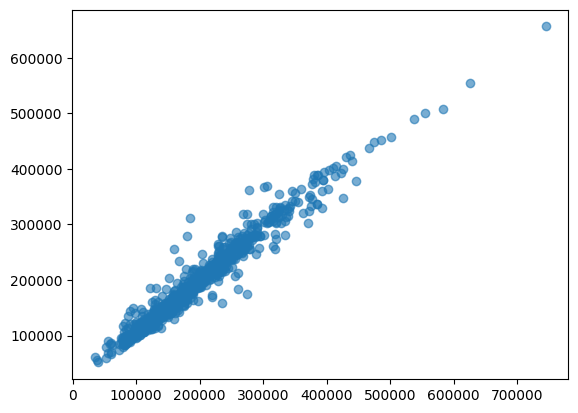

In [45]:
# 驗證模型
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
print("測試組 R2:", r2)
plt.scatter(y, y_pred, alpha=0.6)

plt.show()